In [1]:
import numpy as np 
import seaborn as sns 
#darkmode 
sns.set_style("darkgrid")


In [13]:
x = np.random.uniform(0,1,1000) 
print(x.shape)

(1000,)


In [14]:
y = 3 + 2*x  + np.random.normal(0,0.1,1000) 
print(y.shape)

(1000,)


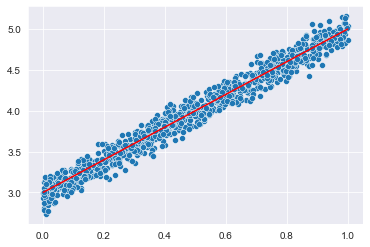

In [15]:
#plot x to y 
_ = sns.scatterplot(x= x,y = y)
#plot the line 2x+3 as a red line 
_ = sns.lineplot(x = x, y = 2*x+3, color = "red")

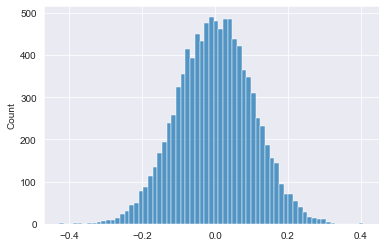

In [9]:
random_noise = np.random.normal(0,.1,10000)
_ = sns.histplot(data = random_noise)

In [16]:
#add an intercept column to x as the first column
X = np.column_stack((np.ones(x.shape[0]),x))

In [19]:
#goal: find something close to (3,2)
beta = np.linalg.solve(np.dot(X.T,X),np.dot(X.T,y))
print(beta)

[2.98706348 2.01362802]


In [20]:
def generate_beta(x):
    y = 3 + 2*x  + np.random.normal(0,0.1,1000) 
    X = np.column_stack((np.ones(x.shape[0]),x))
    beta = np.linalg.solve(np.dot(X.T,X),np.dot(X.T,y))
    return beta

In [21]:
betas = [generate_beta(x) for _ in range(10_000)]
    

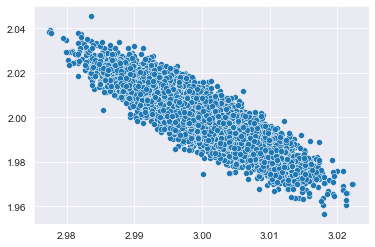

In [22]:
#plot the betas as a scatterplot
_ = sns.scatterplot(x = [b[0] for b in betas], y = [b[1] for b in betas])

It turns out that the distribution of these betas is given by a multivariate normal distribution with mean
$$(3,2)$$
and covariance matrix
$$\Sigma = \sigma^2 (X^T X)^{-1}$$


In [23]:
Sigma = np.linalg.inv(np.dot(X.T,X))*.1**2
print(Sigma)

[[ 4.12359814e-05 -6.30177982e-05]
 [-6.30177982e-05  1.27136805e-04]]


In [24]:
#generate points from this multivariate normal distribution
beta = np.random.multivariate_normal([3,2],Sigma)
print(beta)

[2.98931411 2.01997351]


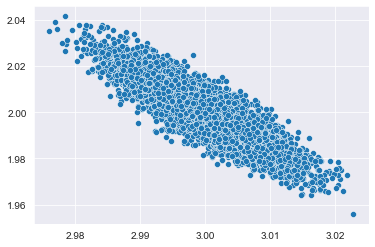

In [25]:
betas_sim = [np.random.multivariate_normal([3,2],Sigma) for _ in range(10_000)]
#scatter plot 
_ = sns.scatterplot(x = [b[0] for b in betas_sim], y = [b[1] for b in betas_sim])